# EDA

In [1]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt #a plotting libary
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 
from numpy import percentile
import statistics 
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency 
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")

In [2]:
#reading from the CSV file--Data sourced from Kaggle
churn_df = pd.read_csv("Telco_customer_churn.csv")
churn_df.head(1)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer


In [3]:
#checking columns with null values so that we can treat them correctly and realized that only ChurnReason column has ChurnReason null values, we later found out its because of people who had not churned.
churn_df.isnull().sum()

CustomerID             0
Count                  0
Country                0
State                  0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
TenureMonths           0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

In [4]:
churn_df.describe() #checking the statistical metrics such as mean, std, min, max etc of the dataset

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
churn_df.info()#checking for the different data types of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
CustomerID          7043 non-null object
Count               7043 non-null int64
Country             7043 non-null object
State               7043 non-null object
City                7043 non-null object
ZipCode             7043 non-null int64
LatLong             7043 non-null object
Latitude            7043 non-null float64
Longitude           7043 non-null float64
Gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
TenureMonths        7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null

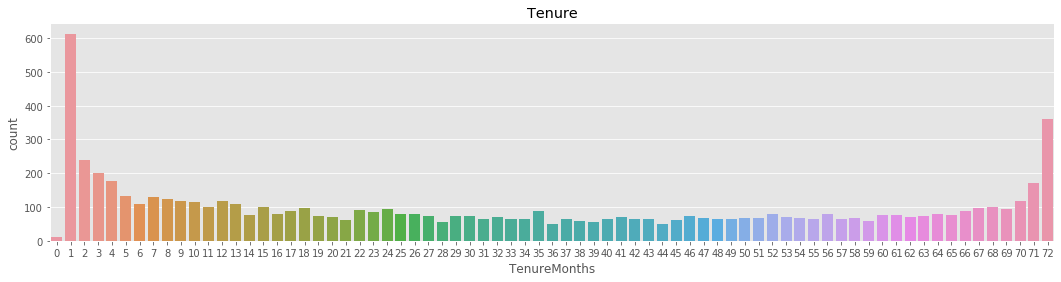

In [6]:
#checking the range of tenure in months for customers in the camapny
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="TenureMonths", data=churn_df)
plt.title(f'Tenure')
plt.show()


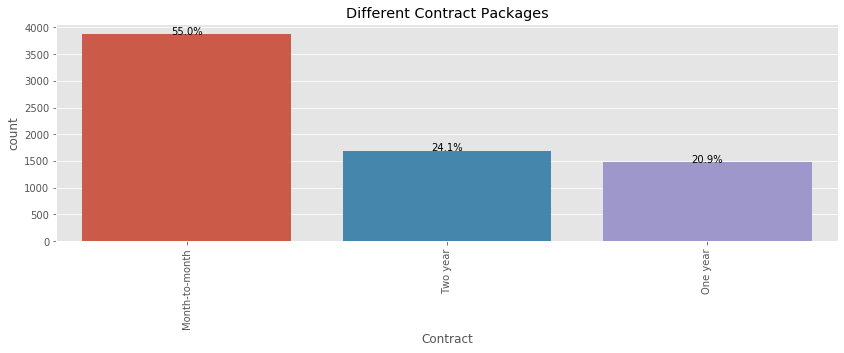

In [7]:
#checkin the different contract types and calculated their respective percentages. Most customers are on Month-on-Month contract
f, ax = plt.subplots(figsize=(14, 4))
ax = sns.countplot(x="Contract", data=churn_df)

# Add percentage labels on top of each bar
total = float(len(churn_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.1%}', ha="center")
    
# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.title(f'Different Contract Packages')
plt.show()

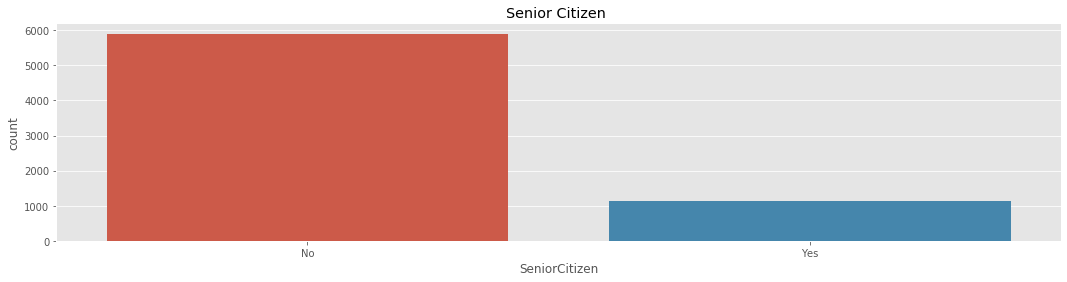

In [8]:
#checking which citizen we have and discovered that we have more non-senior citizen 
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="SeniorCitizen", data=churn_df)
plt.title(f'Senior Citizen ')
plt.show()


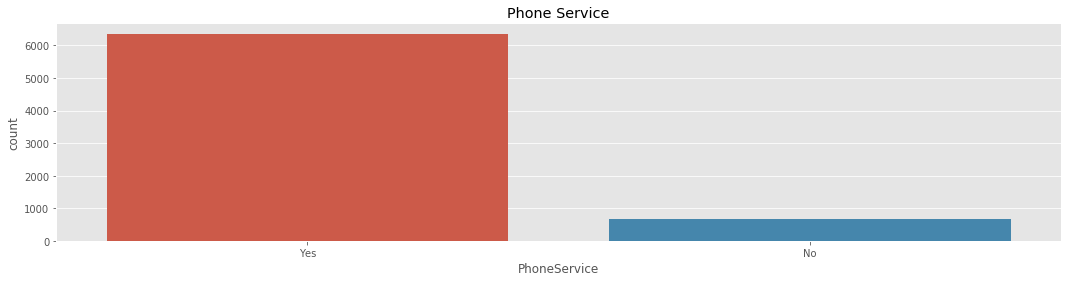

In [9]:
#checking how many customers use Phone service as compared to those who do not.
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="PhoneService", data=churn_df)
plt.title(f'Phone Service')
plt.show()


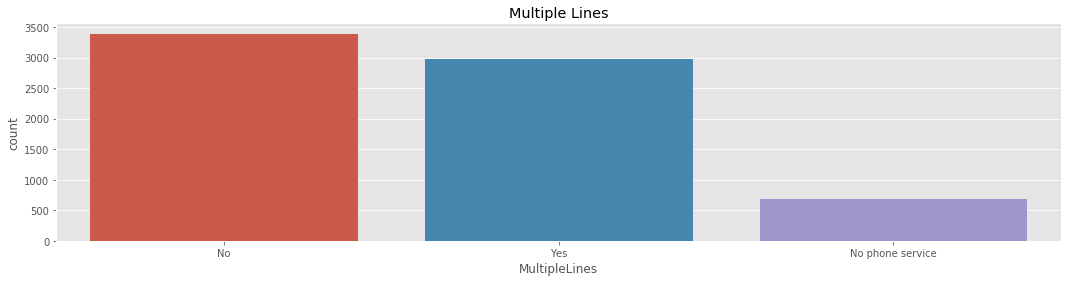

In [10]:
#checking the values
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="MultipleLines", data=churn_df)
plt.title(f'Multiple Lines')
plt.show()

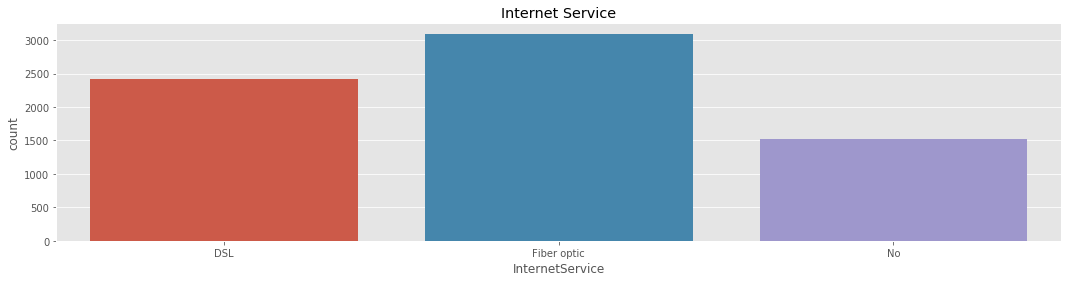

In [11]:
#checking customers who has Internet service from the campany and those who do not.
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="InternetService", data=churn_df)
plt.title(f'Internet Service')
plt.show()


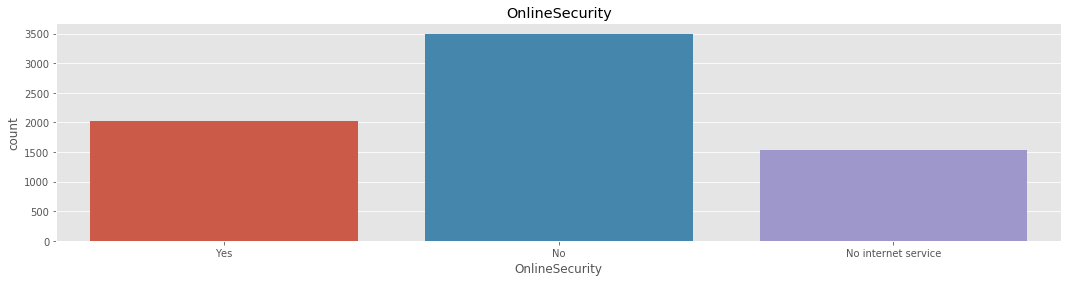

In [12]:
#checking customers who has OnlineSecurity from the campany and those who do not.
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="OnlineSecurity", data=churn_df)
plt.title(f'OnlineSecurity')
plt.show()
# ### There are three types of employee status 


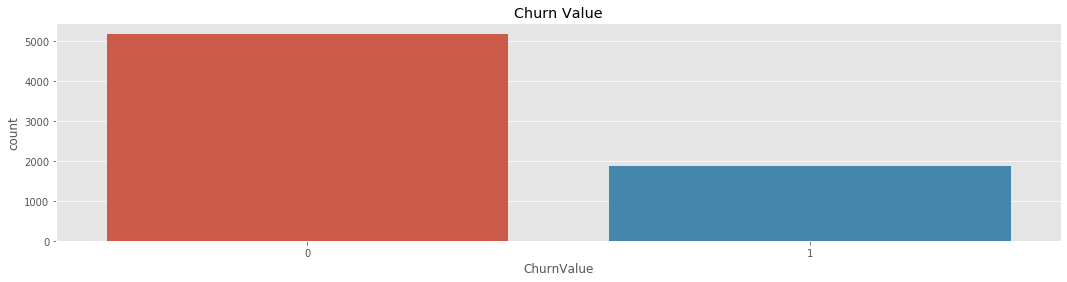

In [13]:
#checking how many people churned VS those who did not
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="ChurnValue", data=churn_df)
plt.title(f'Churn Value')
plt.show()
# ### There are three types of employee status 

In [14]:
churn_df.head(1)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer


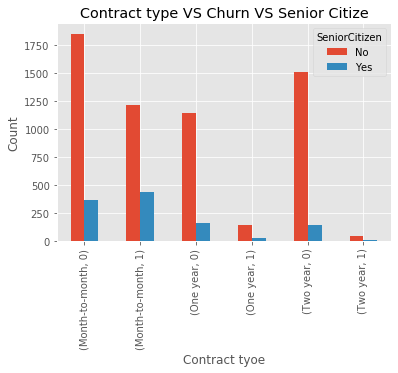

In [15]:
#) Identify the groups of people most likely to churn and their associated contract types, then visualize the results in a bar chart.

location_counts = churn_df.groupby(['Contract', 'ChurnValue','SeniorCitizen']).size().unstack(fill_value=0)
location_counts

# Plot the value counts as a bar chart
location_counts.plot(kind='bar')

plt.title('Contract type VS Churn VS Senior Citize')
plt.xlabel('Contract tyoe')
plt.ylabel('Count')

# Display the bar chart
plt.show()

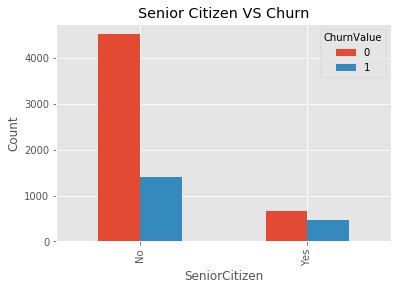

In [16]:
#) Which group of people(senior citizen vs non-senior citizen) are likely to churn

location_counts = churn_df.groupby(['SeniorCitizen', 'ChurnValue']).size().unstack(fill_value=0)
location_counts

# Plot the value counts as a bar chart
location_counts.plot(kind='bar')
plt.title('Senior Citizen VS Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')

# Display the bar chart
plt.show()

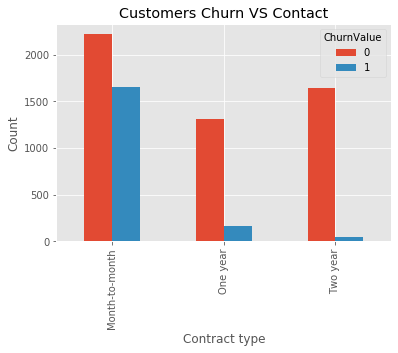

In [17]:
#checking people under which contract are likely to churn, then discovered that month on month customers have a high churn rate compared to others
location_counts = churn_df.groupby(['Contract', 'ChurnValue']).size().unstack(fill_value=0)
location_counts
location_counts.plot(kind='bar')
plt.title('Customers Churn VS Contact')
plt.xlabel('Contract type')
plt.ylabel('Count')

plt.show()

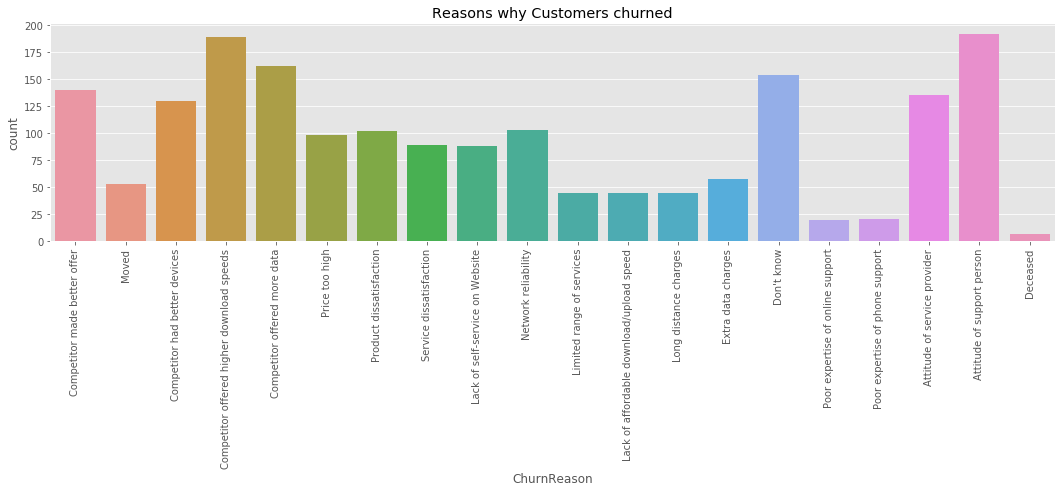

In [18]:
# looking at the reasons why customers churned and most did so because of the attitude of a person offering them support and competitors
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="ChurnReason", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Reasons why Customers churned')
plt.show()

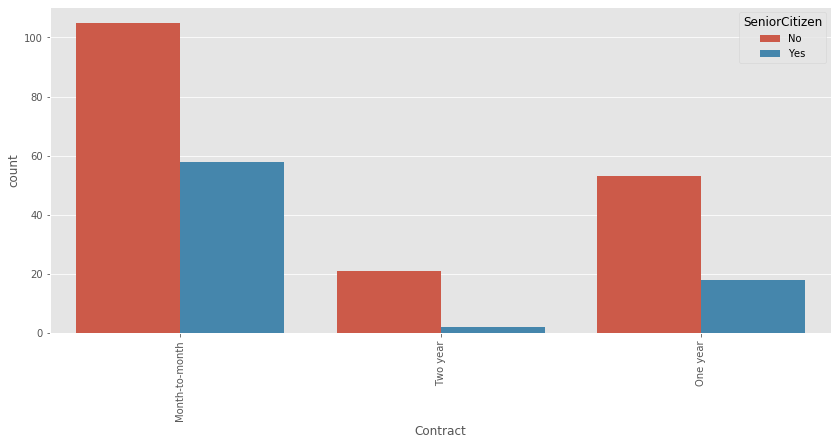

In [19]:
#checking the of numbers of different citizens in each contract type

#checking for people who have churned and pay more or eqal $100 in a month
filtered_df = churn_df[(churn_df['MonthlyCharges'] >= 100)&(churn_df['ChurnValue'] == 1)]
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="Contract", hue="SeniorCitizen", data=filtered_df)
    
# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show()

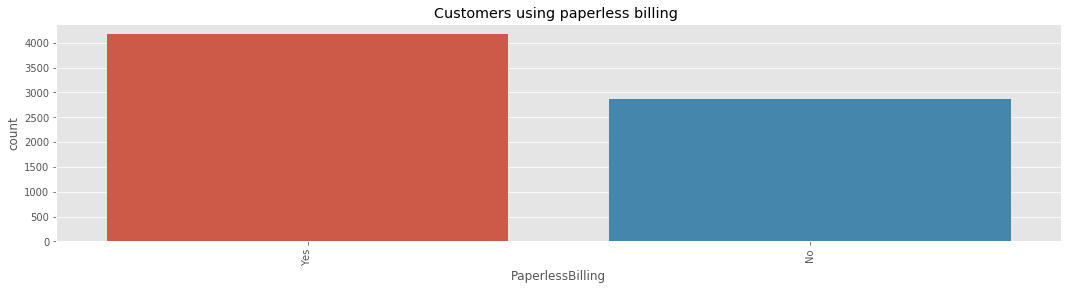

In [20]:
#checking customers who use paperlessbilling VS those who do not.
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="PaperlessBilling", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Customers using paperless billing ')
plt.show()

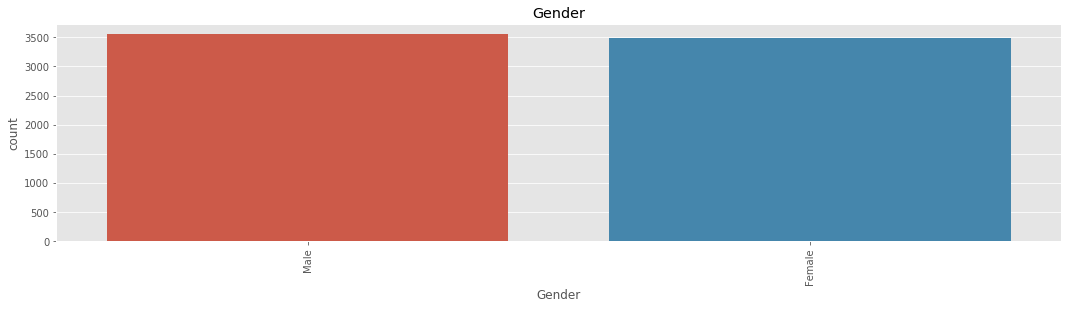

In [21]:
#Checking different genders
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="Gender", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Gender')
plt.show()

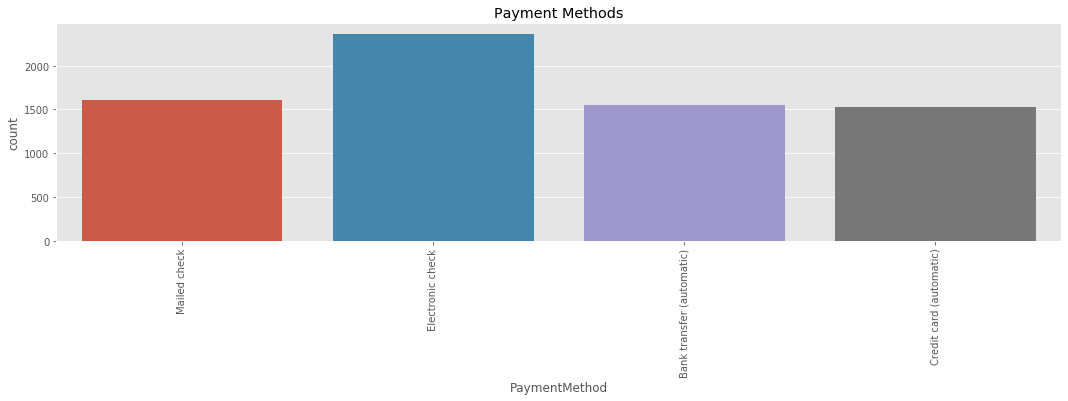

In [22]:
#checking different payment methods used by customers
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="PaymentMethod", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Payment Methods')
plt.show()

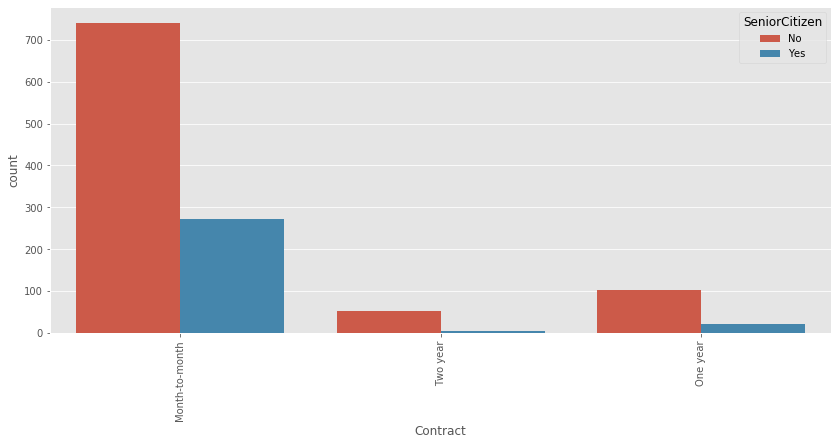

In [23]:
#Checking people with a high churn score greater or equal 80, the contract they are in and that type of citizen they are.
filtered_df = churn_df[(churn_df['ChurnScore'] >=80)]#filtering which the churn Score equla or greater than 80
f, ax = plt.subplots(figsize=(14, 6))
ax = sns.countplot(x="Contract", hue="SeniorCitizen", data=filtered_df)
    
# Set x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show()

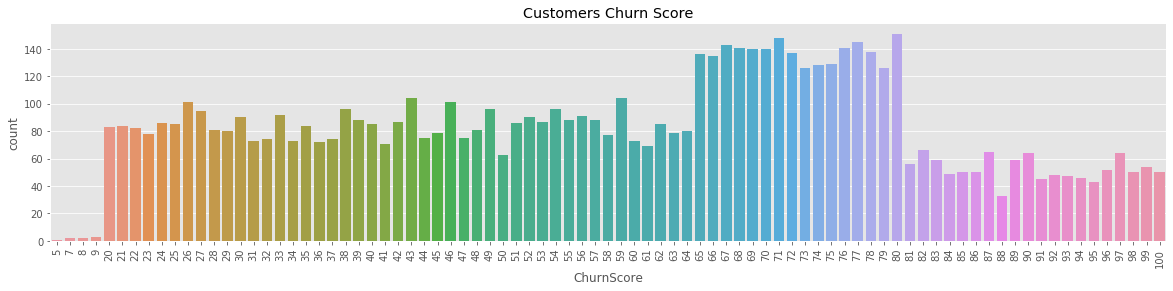

In [24]:
# Churn Score distribution
f, ax = plt.subplots(figsize=(20, 4))
ax = sns.countplot(x="ChurnScore", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Customers Churn Score')
plt.show()

# Data cleaning

In [25]:
churn_df.head(2)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


In [26]:
churn_df['MonthlyCharges'].min()#checking the minimun value in the Monthly recharge column

18.25

In [27]:
#creating Payment value bands to classify customers as low, medium ect
bins = [17, 25, 45, 65, 85, 119] #creating the bins
labels = ['Ultra Low Value', 'Low Value', 'Medium Value', 'High Value', 'Ultra High value'] #creating the lables to classify the customer

# Create age groups
churn_df['MonthlyCharges_range'] = pd.cut(churn_df['MonthlyCharges'], bins=bins, labels=labels, right=False) #creating a new column for the payment value bands 

# Display the DataFrame
churn_df.head(2)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,High Value


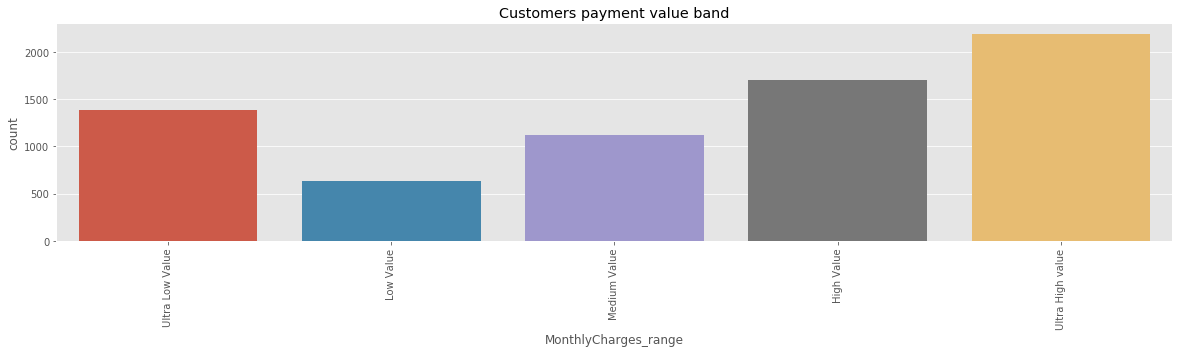

In [28]:
#displaying different the Payment value bands, most customers are on Ultra high value band
f, ax = plt.subplots(figsize=(20, 4))
ax = sns.countplot(x="MonthlyCharges_range", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Customers payment value band')
plt.show()

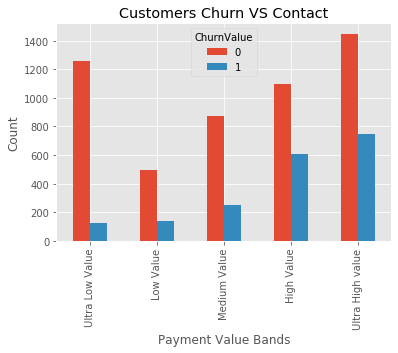

In [29]:
#checking people who are likely to churn and payment value bands they are in
location_counts = churn_df.groupby(['MonthlyCharges_range', 'ChurnValue']).size().unstack(fill_value=0)
location_counts


location_counts.plot(kind='bar')


plt.title('Customers Churn VS Contact')
plt.xlabel('Payment Value Bands')
plt.ylabel('Count')

plt.show()

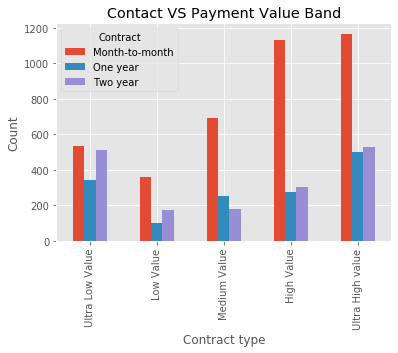

In [30]:
#checking people under each contract and the payment value band they are in
location_counts = churn_df.groupby(['MonthlyCharges_range', 'Contract']).size().unstack(fill_value=0)
location_counts


location_counts.plot(kind='bar')


plt.title('Contact VS Payment Value Band')
plt.xlabel('Contract type')
plt.ylabel('Count')

plt.show()

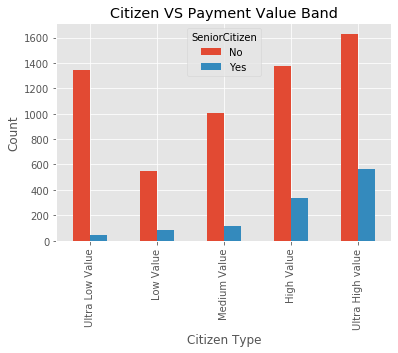

In [31]:
#checking different citizens and the payment value bans they are in.
location_counts = churn_df.groupby(['MonthlyCharges_range', 'SeniorCitizen']).size().unstack(fill_value=0)
location_counts


location_counts.plot(kind='bar')


plt.title('Citizen VS Payment Value Band')
plt.xlabel('Citizen Type')
plt.ylabel('Count')

plt.show()

In [32]:
churn_df['TenureMonths'].max()# the maximu months a customer is with the company

72

In [33]:
#Payment range
# Define bins and labels
bins = [0, 3, 6, 12, 24, 36, 48,60, 72]
labels = ['3 Months', '6 Months', '1 Year', '2 Years', '3 Years', '4 Years', '5 Years', '6 Years']

# Create age groups
churn_df['Tenure_Range'] = pd.cut(churn_df['TenureMonths'], bins=bins, labels=labels, right=False)#creating tenure months ranges column

# Display the DataFrame
churn_df.head(2)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value,3 Months
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,High Value,3 Months


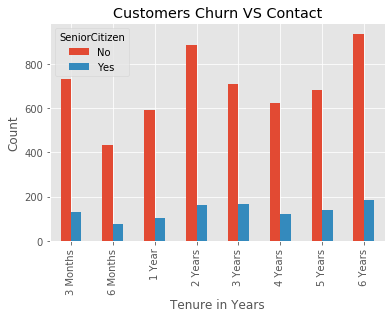

In [34]:
#Checking citizen and the tenure(years) they are in
location_counts = churn_df.groupby(['Tenure_Range', 'SeniorCitizen']).size().unstack(fill_value=0)
location_counts


location_counts.plot(kind='bar')


plt.title('Customers Churn VS Contact')
plt.xlabel('Tenure in Years')
plt.ylabel('Count')

plt.show()

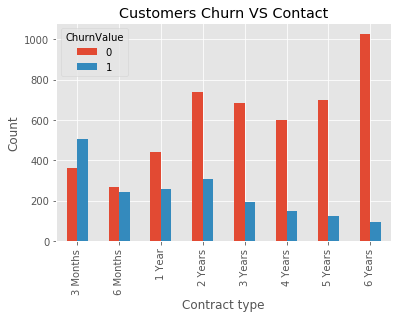

In [35]:
# customer with how many years are likely to churn
location_counts = churn_df.groupby(['Tenure_Range', 'ChurnValue']).size().unstack(fill_value=0)
location_counts


location_counts.plot(kind='bar')


plt.title('Customers Churn VS Contact')
plt.xlabel('Contract type')
plt.ylabel('Count')

plt.show()

In [36]:
# replacing null values in Reason type column with (Did not Churn) for people who did not churn 
churn_df.loc[churn_df['ChurnValue'] == 0, 'ChurnReason'] = churn_df.loc[churn_df['ChurnValue'] == 0, 'ChurnReason'].fillna('Did not Churn')
churn_df['ChurnReason'].isnull().sum()

0

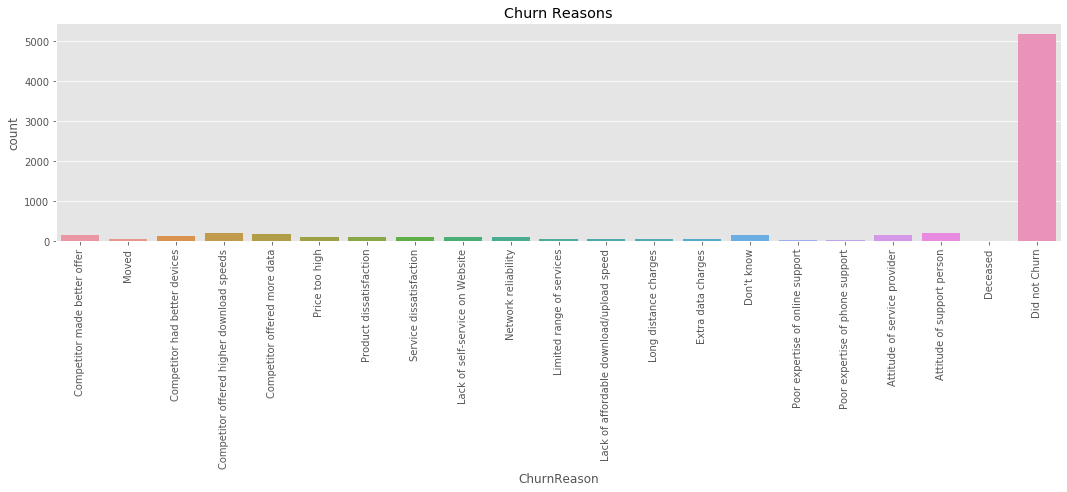

In [37]:
# Checking different reasons for leaving the campany
f, ax = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x="ChurnReason", data=churn_df)
plt.xticks(rotation=90)  
plt.title(f'Churn Reasons')
plt.show()

In [38]:
churn_df.head(1)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value,3 Months


In [39]:
#droppting columns which are not to be used in the model
churn_df = churn_df.drop(columns=['State', 'Country','Count','ZipCode','LatLong','Latitude','Longitude','Dependents','Partner'])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
CustomerID              7043 non-null object
City                    7043 non-null object
Gender                  7043 non-null object
SeniorCitizen           7043 non-null object
TenureMonths            7043 non-null int64
PhoneService            7043 non-null object
MultipleLines           7043 non-null object
InternetService         7043 non-null object
OnlineSecurity          7043 non-null object
OnlineBackup            7043 non-null object
DeviceProtection        7043 non-null object
TechSupport             7043 non-null object
StreamingTV             7043 non-null object
StreamingMovies         7043 non-null object
Contract                7043 non-null object
PaperlessBilling        7043 non-null object
PaymentMethod           7043 non-null object
MonthlyCharges          7043 non-null float64
TotalCharges            7043 non-null object
ChurnLabel              7043 non-null 

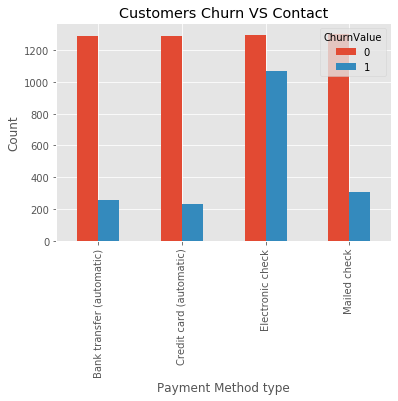

In [40]:
# customer under which payment method are likely to churn
location_counts = churn_df.groupby(['PaymentMethod', 'ChurnValue']).size().unstack(fill_value=0)
location_counts


location_counts.plot(kind='bar')


plt.title('Customers Churn VS Contact')
plt.xlabel('Payment Method type')
plt.ylabel('Count')

plt.show()


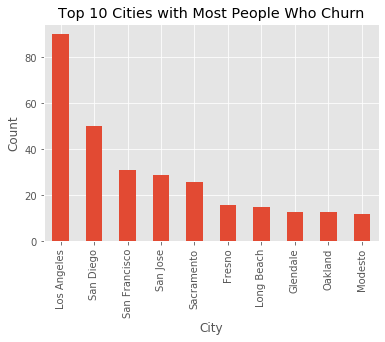

In [41]:
# Group by City and ChurnValue, then unstack to get counts
location_counts = churn_df.groupby(['City', 'ChurnValue']).size().unstack(fill_value=0)

# Select the top 10 cities with the most people who will churn (ChurnValue = 1)
top_10_cities_churn = location_counts[1].nlargest(10)

# Plot the data
top_10_cities_churn.plot(kind='bar')

plt.title('Top 10 Cities with Most People Who Churn')
plt.xlabel('City')
plt.ylabel('Count')

plt.show()



In [42]:
# replacing categorical values with numerical values
mapping = {'Female': 0, 'Male': 1}

# Convert 'gender to string type 
churn_df['Gender'] = churn_df['Gender'].astype(str)

# Replace categorical values with numerical values
churn_df['Gender'] = churn_df['Gender'].replace(mapping)

# Convert the resulting column to integer type
churn_df['Gender'] = churn_df['Gender'].astype(int)

churn_df.head(2)

,CustomerID,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,Los Angeles,1,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value,3 Months
1,9237-HQITU,Los Angeles,0,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,High Value,3 Months


In [43]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
CustomerID              7043 non-null object
City                    7043 non-null object
Gender                  7043 non-null int32
SeniorCitizen           7043 non-null object
TenureMonths            7043 non-null int64
PhoneService            7043 non-null object
MultipleLines           7043 non-null object
InternetService         7043 non-null object
OnlineSecurity          7043 non-null object
OnlineBackup            7043 non-null object
DeviceProtection        7043 non-null object
TechSupport             7043 non-null object
StreamingTV             7043 non-null object
StreamingMovies         7043 non-null object
Contract                7043 non-null object
PaperlessBilling        7043 non-null object
PaymentMethod           7043 non-null object
MonthlyCharges          7043 non-null float64
TotalCharges            7043 non-null object
ChurnLabel              7043 non-null o

In [44]:

#replacing categorical values with numerical values
mapping = {'No': 0, 'Yes': 1}

# Convert all necessary columns to string type
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype(str)
churn_df['PhoneService'] = churn_df['PhoneService'].astype(str)
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].astype(str)


# Replace categorical values with numerical values
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].replace(mapping)
churn_df['PhoneService'] = churn_df['PhoneService'].replace(mapping)
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].replace(mapping)


# Convert the resulting column to integer type
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype(int)
churn_df['PhoneService'] = churn_df['PhoneService'].astype(int)
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].astype(int)


churn_df.head(1)

,CustomerID,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,Los Angeles,1,0,2,1,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Medium Value,3 Months


In [45]:

#replacing categorical values with numerical values
mapping = {'No': 0, 'Yes': 1,'No internet service':2 ,'No phone service':2, 'DSL': 1,'Fiber optic': 1}

# Convert all necessary columns to string type if necessary
churn_df['StreamingMovies'] = churn_df['StreamingMovies'].astype(str)
churn_df['StreamingTV'] = churn_df['StreamingTV'].astype(str)
churn_df['TechSupport'] = churn_df['TechSupport'].astype(str)
churn_df['DeviceProtection'] = churn_df['DeviceProtection'].astype(str)
churn_df['OnlineBackup'] = churn_df['OnlineBackup'].astype(str)
churn_df['OnlineSecurity'] = churn_df['OnlineSecurity'].astype(str) 
churn_df['MultipleLines'] = churn_df['MultipleLines'].astype(str)
churn_df['InternetService'] = churn_df['InternetService'].astype(str)
churn_df['ChurnLabel'] = churn_df['ChurnLabel'].astype(str)

# Replace categorical values with numerical values
churn_df['StreamingMovies'] = churn_df['StreamingMovies'].replace(mapping)
churn_df['StreamingTV'] = churn_df['StreamingTV'].replace(mapping)
churn_df['TechSupport'] = churn_df['TechSupport'].replace(mapping)
churn_df['DeviceProtection'] = churn_df['DeviceProtection'].replace(mapping)
churn_df['OnlineBackup'] = churn_df['OnlineBackup'].replace(mapping)
churn_df['OnlineSecurity'] = churn_df['OnlineSecurity'].replace(mapping)
churn_df['MultipleLines'] = churn_df['MultipleLines'].replace(mapping)
churn_df['InternetService'] = churn_df['InternetService'].replace(mapping)
churn_df['ChurnLabel'] = churn_df['ChurnLabel'].replace(mapping)

#Convert the resulting column to integer type
churn_df['StreamingMovies'] = churn_df['StreamingMovies'].astype(int)
churn_df['StreamingTV'] = churn_df['StreamingTV'].astype(int)
churn_df['TechSupport'] = churn_df['TechSupport'].astype(int)
churn_df['DeviceProtection'] = churn_df['DeviceProtection'].astype(int)
churn_df['OnlineBackup'] = churn_df['OnlineBackup'].astype(int)
churn_df['OnlineSecurity'] = churn_df['OnlineSecurity'].astype(int)
churn_df['MultipleLines'] = churn_df['MultipleLines'].astype(int)
churn_df['InternetService'] = churn_df['InternetService'].astype(int)
churn_df['ChurnLabel'] = churn_df['ChurnLabel'].astype(int)


churn_df.head(1)

,CustomerID,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,MonthlyCharges_range,Tenure_Range
0,3668-QPYBK,Los Angeles,1,0,2,1,0,1,1,1,...,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer,Medium Value,3 Months


In [46]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the column
churn_df['PaymentMethod'] = le.fit_transform(churn_df['PaymentMethod'])
churn_df['Contract'] = le.fit_transform(churn_df['Contract'])
churn_df['ChurnReason'] = le.fit_transform(churn_df['ChurnReason'])
churn_df['City'] = le.fit_transform(churn_df['City'])
churn_df['City'].unique()

array([ 562,   77,  442, ...,  965, 1031,  713], dtype=int64)

In [47]:
churn_df['ChurnLabel'].unique()#checking unique values in a column

array([1, 0], dtype=int64)

In [48]:
#Converting the TotalCharges from oject to float
churn_df['TotalCharges'].isnull().sum() 

# Identify non-numeric values
non_numeric = churn_df[~churn_df['TotalCharges'].apply(lambda x: x.replace('.', '', 1).isdigit())]
print("Non-numeric values:\n", non_numeric)

# Replace non-numeric values with NaN
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Drop rows with NaN values
churn_df.dropna(subset=['TotalCharges'], inplace=True)

# Convert the column to float
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)

#print(churn_df)


Non-numeric values:
       CustomerID  City  Gender  SeniorCitizen  TenureMonths  PhoneService  \
2234  4472-LVYGI   865       0              0             0             0   
2438  3115-CZMZD   450       1              0             0             1   
2568  5709-LVOEQ   888       0              0             0             1   
2667  4367-NUYAO   238       1              0             0             1   
2856  1371-DWPAZ   820       0              0             0             0   
4331  7644-OMVMY   562       1              0             0             1   
4687  3213-VVOLG   982       1              0             0             1   
5104  2520-SGTTA    71       0              0             0             1   
5719  2923-ARZLG   501       1              0             0             1   
6772  4075-WKNIU    66       0              0             0             1   
6840  2775-SEFEE  1100       1              0             0             1   

      MultipleLines  InternetService  OnlineSecurity  

In [49]:
churn_df.dtypes

CustomerID                object
City                       int32
Gender                     int32
SeniorCitizen              int32
TenureMonths               int64
PhoneService               int32
MultipleLines              int32
InternetService            int32
OnlineSecurity             int32
OnlineBackup               int32
DeviceProtection           int32
TechSupport                int32
StreamingTV                int32
StreamingMovies            int32
Contract                   int32
PaperlessBilling           int32
PaymentMethod              int32
MonthlyCharges           float64
TotalCharges             float64
ChurnLabel                 int32
ChurnValue                 int64
ChurnScore                 int64
CLTV                       int64
ChurnReason                int32
MonthlyCharges_range    category
Tenure_Range            category
dtype: object

In [50]:
#emove columns that are highly correlated with the target variable and those not necessary for the model
Final_churn_df = churn_df.drop(columns=['CustomerID','MonthlyCharges_range','Tenure_Range','Tenure_Range','ChurnLabel','ChurnScore'])
Final_churn_df.head(1)

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnValue,CLTV,ChurnReason
0,562,1,0,2,1,0,1,1,1,0,...,0,0,0,1,3,53.85,108.15,1,3239,3


City
Before Skew : -0.18


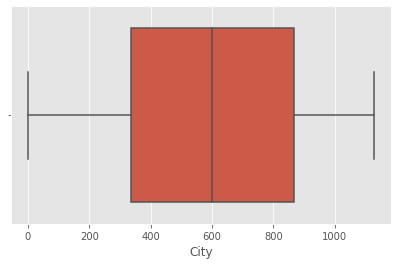

Gender
Before Skew : -0.02


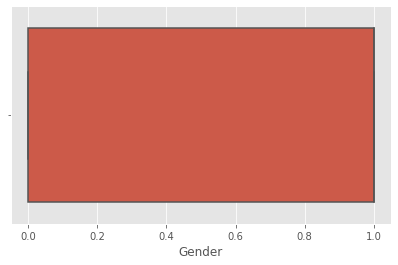

SeniorCitizen
Before Skew : 1.83


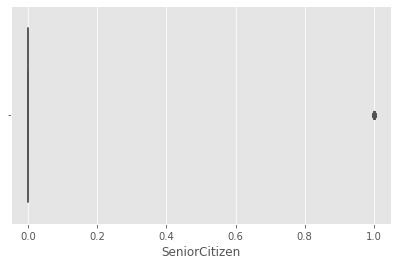

TenureMonths
Before Skew : 0.24


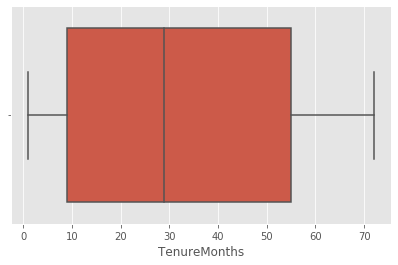

PhoneService
Before Skew : -2.73


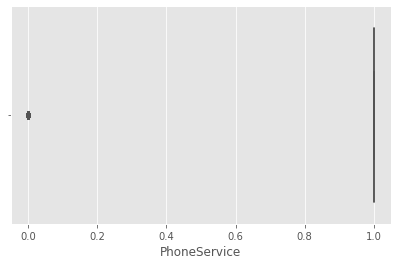

MultipleLines
Before Skew : 0.6


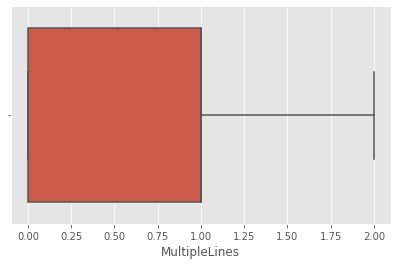

InternetService
Before Skew : -1.38


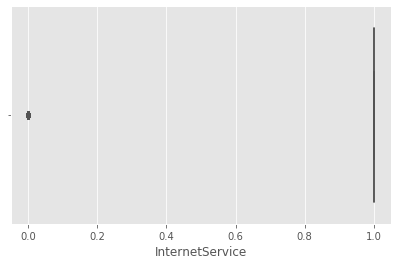

OnlineSecurity
Before Skew : 0.55


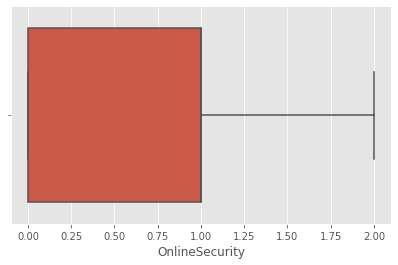

OnlineBackup
Before Skew : 0.41


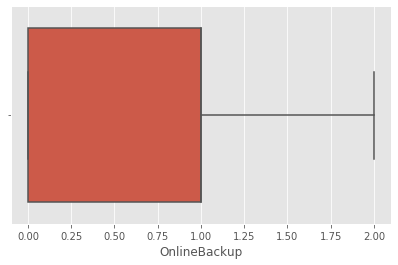

DeviceProtection
Before Skew : 0.41


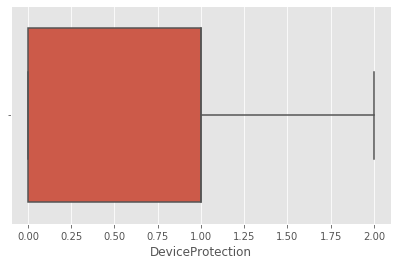

TechSupport
Before Skew : 0.54


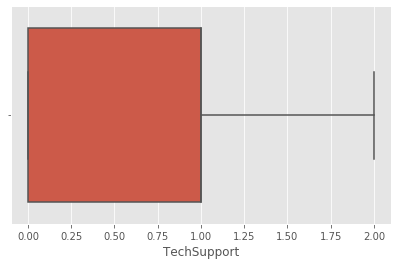

StreamingTV
Before Skew : 0.32


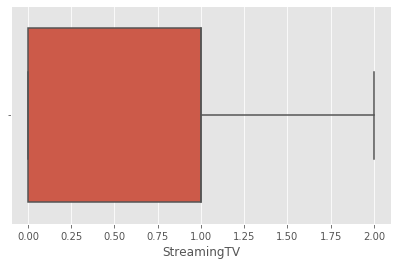

StreamingMovies
Before Skew : 0.31


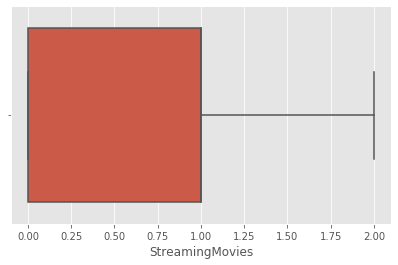

Contract
Before Skew : 0.64


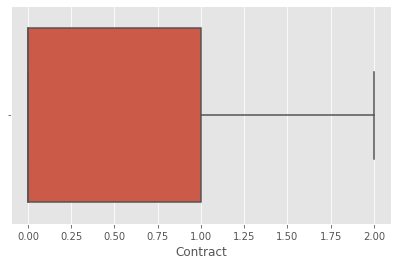

PaperlessBilling
Before Skew : -0.38


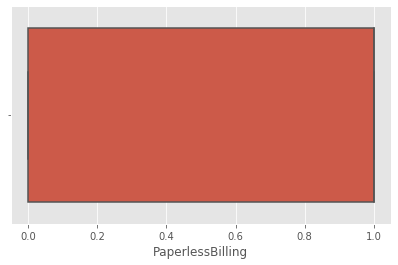

PaymentMethod
Before Skew : -0.17


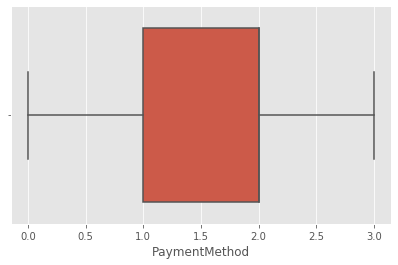

MonthlyCharges
Before Skew : -0.22


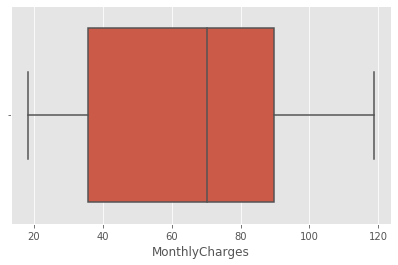

TotalCharges
Before Skew : 0.96


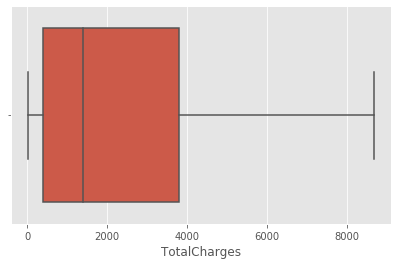

ChurnValue
Before Skew : 1.06


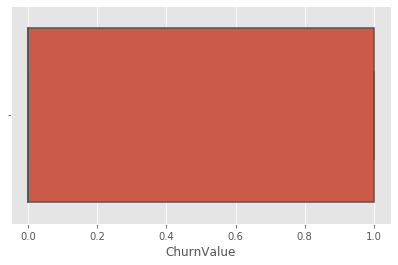

CLTV
Before Skew : -0.31


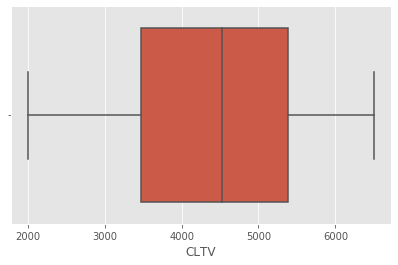

ChurnReason
Before Skew : 1.63


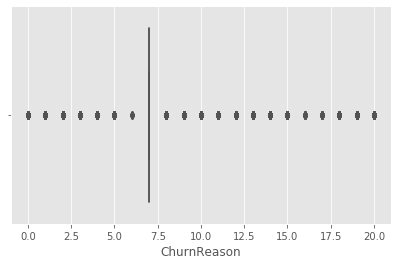

In [51]:
#checking outliars
for col in Final_churn_df:
    print(col)
    print('Before Skew :', round(Final_churn_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=Final_churn_df[col])
    plt.show()

# Feature Selection

In [52]:

X  = Final_churn_df.drop(columns=['ChurnValue'])#droping th target from the feature to be selected for the model and assign them to X
y = Final_churn_df['ChurnValue']# assign the target to y
y.head(3)

0    1
1    1
2    1
Name: ChurnValue, dtype: int64

In [53]:
#the feature selection using LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

# Evaluate the model on the test set
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Feature selection using L1 regularization (Lasso)
# SelectFromModel will select features whose importance is greater than the mean importance of all the features
feature_selector = SelectFromModel(logreg, threshold='mean')
feature_selector.fit(X_train, y_train)

# Get selected feature indices
selected_features_indices = feature_selector.get_support(indices=True)

# Print selected feature indices
print("Selected Feature Indices:", selected_features_indices)

# Transform the training and testing sets to include only selected features
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Initialize logistic regression model with selected features
logreg_selected = LogisticRegression(max_iter=1000)

# Fit the model with selected features
logreg_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set with selected features
y_pred_selected = logreg_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with Selected Features:", accuracy_selected)

Coefficients: [[ 6.42067127e-05 -1.67551276e-02  3.61319460e-01 -6.89676549e-02
  -2.94137200e-01  1.25408696e-01 -6.01806161e-01 -4.82730412e-01
  -1.74575739e-01  9.21208064e-03 -4.32878431e-01  1.11180806e-01
   2.01210954e-01 -8.06977826e-01  4.31095902e-01  6.55687331e-02
   1.09399549e-02  4.30007047e-04 -1.40384961e-05  6.87303688e-02]]
Intercept: [-0.41192133]
Accuracy: 0.7953091684434968
Selected Feature Indices: [ 2  4  6  7 10 13 14]
Accuracy with Selected Features: 0.7611940298507462


# FEATURE SELECTION 2

In [54]:
Final_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
City                7032 non-null int32
Gender              7032 non-null int32
SeniorCitizen       7032 non-null int32
TenureMonths        7032 non-null int64
PhoneService        7032 non-null int32
MultipleLines       7032 non-null int32
InternetService     7032 non-null int32
OnlineSecurity      7032 non-null int32
OnlineBackup        7032 non-null int32
DeviceProtection    7032 non-null int32
TechSupport         7032 non-null int32
StreamingTV         7032 non-null int32
StreamingMovies     7032 non-null int32
Contract            7032 non-null int32
PaperlessBilling    7032 non-null int32
PaymentMethod       7032 non-null int32
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
ChurnValue          7032 non-null int64
CLTV                7032 non-null int64
ChurnReason         7032 non-null int32
dtypes: float64(2), int32(16), int64(3)
memory us

In [55]:
#seprating the target with other feature to select for the model 
hr_vars=Final_churn_df.columns.values.tolist()
y=['ChurnValue']
X=[i for i in hr_vars if i not in y]

In [56]:
#using RFE to select fearures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(Final_churn_df[X], Final_churn_df[y])
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True  True  True  True False  True False
 False  True  True  True False False False False]
[10  6  1  4  1  1  1  1  1  3  1  8  7  1  1  1  5  9 11  2]


In [57]:
#seprating the target with other feature to select for the model 
x_features = Final_churn_df.drop(columns=['ChurnValue'])
y_target = Final_churn_df['ChurnValue']
x_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
City                7032 non-null int32
Gender              7032 non-null int32
SeniorCitizen       7032 non-null int32
TenureMonths        7032 non-null int64
PhoneService        7032 non-null int32
MultipleLines       7032 non-null int32
InternetService     7032 non-null int32
OnlineSecurity      7032 non-null int32
OnlineBackup        7032 non-null int32
DeviceProtection    7032 non-null int32
TechSupport         7032 non-null int32
StreamingTV         7032 non-null int32
StreamingMovies     7032 non-null int32
Contract            7032 non-null int32
PaperlessBilling    7032 non-null int32
PaymentMethod       7032 non-null int32
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
CLTV                7032 non-null int64
ChurnReason         7032 non-null int32
dtypes: float64(2), int32(16), int64(2)
memory usage: 714.2 KB


In [58]:
# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_features, y_target)

# Get feature importances
importances = rf.feature_importances_

# Print feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.03239081663761979
Feature 1: 0.005769095351307362
Feature 2: 0.0046540013842524975
Feature 3: 0.07416455257036339
Feature 4: 0.0014812627439855209
Feature 5: 0.005475052718763048
Feature 6: 0.01293298103345375
Feature 7: 0.025353168219106142
Feature 8: 0.012913782796807499
Feature 9: 0.00883376882474345
Feature 10: 0.025904115105213104
Feature 11: 0.004559537756298647
Feature 12: 0.005549486692946714
Feature 13: 0.061515034545986114
Feature 14: 0.007490608555361866
Feature 15: 0.01473255093769279
Feature 16: 0.053129797616746445
Feature 17: 0.043168984075601644
Feature 18: 0.03423420276302683
Feature 19: 0.5657471996707234


In [59]:
#selecting data for scaling purposes
selected_data=Final_churn_df.drop(columns=['ChurnValue'])
selected_data.head(1)

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLTV,ChurnReason
0,562,1,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,3239,3


In [60]:
selected_data.corr() #doing feature correlations

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLTV,ChurnReason
City,1.000000,0.010001,-0.010799,0.021684,0.003666,0.003509,-0.000028,0.007376,0.000989,0.004927,-0.003166,0.009409,0.010071,0.011220,0.007377,-0.013782,0.008750,0.020937,-0.006769,0.015447
Gender,0.010001,1.000000,-0.001819,0.005285,-0.007515,0.000084,-0.004745,-0.004365,-0.002978,0.004526,0.000057,0.000578,-0.001339,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.007473,0.002855
SeniorCitizen,-0.010799,-0.001819,1.000000,0.015683,0.008392,0.100120,0.182519,-0.210546,-0.152380,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,0.156258,-0.038158,0.219874,0.102411,-0.003600,0.022977
TenureMonths,0.021684,0.005285,0.015683,1.000000,0.007877,0.243214,0.037529,0.147575,0.180896,0.180895,0.146727,0.138208,0.142143,0.676734,0.004823,-0.370087,0.246862,0.825880,0.396188,-0.044637
PhoneService,0.003666,-0.007515,0.008392,0.007877,1.000000,-0.690813,-0.171817,0.125544,0.149932,0.138938,0.123533,0.171773,0.164379,0.003019,0.016696,-0.005499,0.248033,0.113008,0.022792,0.002413
MultipleLines,0.003509,0.000084,0.100120,0.243214,-0.690813,1.000000,0.313600,-0.235077,-0.210051,-0.200400,-0.232474,-0.202326,-0.194858,0.078254,0.108261,-0.123996,0.146127,0.251357,0.080142,0.006576
InternetService,-0.000028,-0.004745,0.182519,0.037529,-0.171817,0.313600,1.000000,-0.844655,-0.825244,-0.825541,-0.843355,-0.814512,-0.813546,-0.241574,0.320592,-0.125799,0.763191,0.374878,0.011196,0.031314
OnlineSecurity,0.007376,-0.004365,-0.210546,0.147575,0.125544,-0.235077,-0.844655,1.000000,0.751312,0.748684,0.790951,0.701526,0.704672,0.389138,-0.333656,0.045376,-0.620532,-0.153234,0.067254,-0.047690
OnlineBackup,0.000989,-0.002978,-0.152380,0.180896,0.149932,-0.210051,-0.825244,0.751312,1.000000,0.740244,0.753752,0.720277,0.716388,0.350419,-0.261565,0.028808,-0.537727,-0.085017,0.073082,-0.027133
DeviceProtection,0.004927,0.004526,-0.156700,0.180895,0.138938,-0.200400,-0.825541,0.748684,0.740244,1.000000,0.767659,0.762742,0.766635,0.389480,-0.275519,0.022636,-0.512604,-0.077394,0.062257,-0.039686


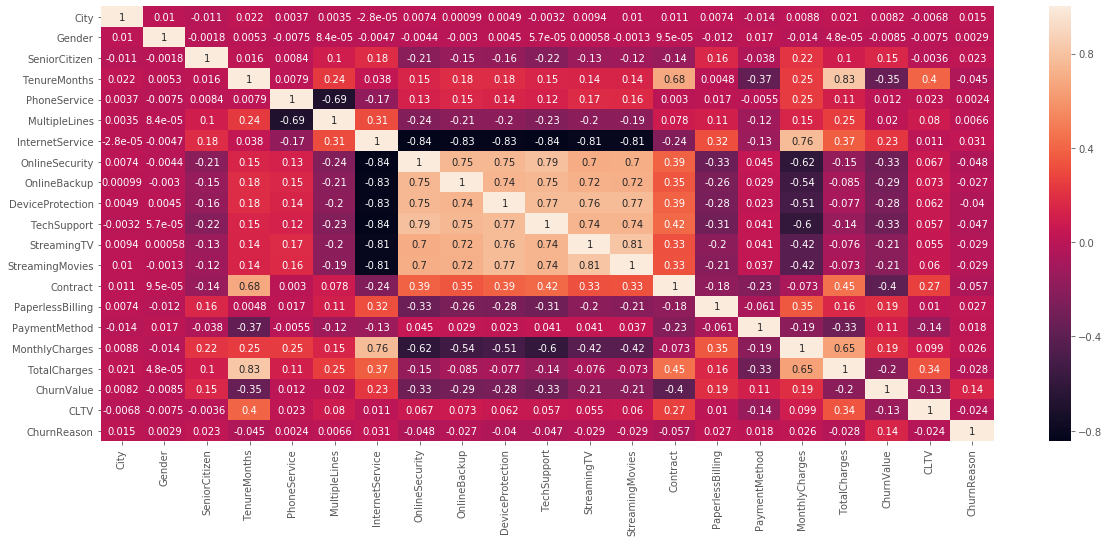

In [61]:
#displaying the correlation between features using heat map
df_small = Final_churn_df
plt.figure(figsize=(20,8))
correlation_mat = df_small.corr()
ax= sns.heatmap(correlation_mat, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Random Forest

In [62]:
Final_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
City                7032 non-null int32
Gender              7032 non-null int32
SeniorCitizen       7032 non-null int32
TenureMonths        7032 non-null int64
PhoneService        7032 non-null int32
MultipleLines       7032 non-null int32
InternetService     7032 non-null int32
OnlineSecurity      7032 non-null int32
OnlineBackup        7032 non-null int32
DeviceProtection    7032 non-null int32
TechSupport         7032 non-null int32
StreamingTV         7032 non-null int32
StreamingMovies     7032 non-null int32
Contract            7032 non-null int32
PaperlessBilling    7032 non-null int32
PaymentMethod       7032 non-null int32
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
ChurnValue          7032 non-null int64
CLTV                7032 non-null int64
ChurnReason         7032 non-null int32
dtypes: float64(2), int32(16), int64(3)
memory us

In [63]:
#Features selected to be used for predictions
X1 = Final_churn_df[['TenureMonths','MonthlyCharges','Contract','InternetService','ChurnReason']]#data is not scaled as random forest can handle such data
y1 =Final_churn_df['ChurnValue'] 
print('Selected Features:')
X1.info()

Selected Features:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
TenureMonths       7032 non-null int64
MonthlyCharges     7032 non-null float64
Contract           7032 non-null int32
InternetService    7032 non-null int32
ChurnReason        7032 non-null int32
dtypes: float64(1), int32(3), int64(1)
memory usage: 247.2 KB


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier with a lower number of trees
rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=20)
# Train the random forest model on your training data
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
#accuracy
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest Accuracy: 0.999


In [67]:
#comparing the train and test scores, checking the recall, precion etc
y_pred= rf.predict(x_test)
from sklearn.metrics import classification_report,balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
class_report_train = classification_report(y_test, rf.predict(x_test))
print ('--------------Random Forest-------------')
print (rf.score(x_train, y_train), '- Train model score')
print(accuracy_score(y_test, rf.predict(x_test)), '- Test model score \n\n')
print(class_report_train)

--------------Random Forest-------------
0.9997968305566842 - Train model score
0.9985781990521327 - Test model score 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1522
           1       1.00      0.99      1.00       588

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110



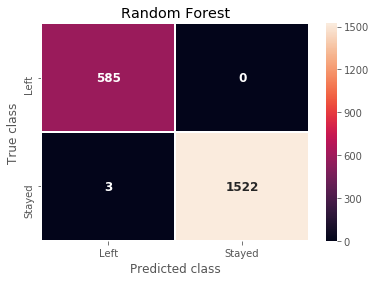

In [68]:
#Using the confusion matrix to see true and the false predisctions
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

forest_cm = confusion_matrix(y_pred, y_test, [1,0])
ax = sns.heatmap(forest_cm, annot=True, fmt='.0f', linewidths=0.5, xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"], annot_kws={"ha": 'center', "va": 'center', 'fontsize': 12, 'weight': 'bold'})

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Logistic Regression

In [69]:
Scale_df =Final_churn_df.drop(columns=['ChurnValue'])
y2 = Final_churn_df['ChurnValue']
Scale_df.head(2)

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLTV,ChurnReason
0,562,1,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,3239,3
1,562,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,2701,14


In [70]:
#data scaling 
Scaler = MinMaxScaler() 
scaled_data = Scaler.fit_transform(Scale_df)
scaled_data = pd.DataFrame(scaled_data, columns=[Scale_df])
scaled_data.head(2)

,City,Gender,SeniorCitizen,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLTV,ChurnReason
0,0.498227,1.0,0.0,0.014085,1.0,0.0,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.01031,0.274850,0.15
1,0.498227,0.0,0.0,0.014085,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.01533,0.155215,0.70


In [71]:
x2 =  scaled_data[['TenureMonths','MonthlyCharges','InternetService','Contract','ChurnReason']]# scaled selected feature to fit to the model

In [72]:
#from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y2, test_size=0.2, random_state=42)

from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
#accuracy
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy: 0.783


In [74]:
#comparing the train and test scores, checking the recall, precion etc
y_pred= logreg.predict(x_test)
from sklearn.metrics import classification_report,balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
class_report_train = classification_report(y_test, logreg.predict(x_test))
print ('--------------Logistic regression-------------')
print (logreg.score(x_train, y_train), '- Train model score')
print(accuracy_score(y_test, logreg.predict(x_test)), '- Test model score \n\n')
print(class_report_train)

--------------Logistic regression-------------
0.7896888888888889 - Train model score
0.7825159914712153 - Test model score 


              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1012
           1       0.67      0.45      0.53       395

    accuracy                           0.78      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



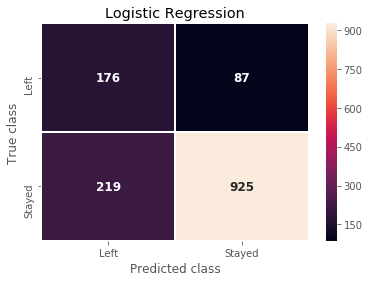

In [75]:
#Using the confusion matrix to see true and the false predisctions
y_pred = logreg.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

forest_cm = confusion_matrix(y_pred, y_test, [1,0])
ax = sns.heatmap(forest_cm, annot=True, fmt='.0f', linewidths=0.5, xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"], annot_kws={"ha": 'center', "va": 'center', 'fontsize': 12, 'weight': 'bold'})

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('random_forest.png', bbox_inches='tight')  # bbox_inches='tight' adjusts the padding to fit everything properly
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# SUPPORT VECTOR MACHINE

In [76]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
#accuracy
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy: 0.969


In [78]:
#comparing the train and test scores, checking the recall, precion etc
y_pred= svc.predict(x_test)
from sklearn.metrics import classification_report,balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
class_report_train = classification_report(y_test, svc.predict(x_test))
print ('--------------Support vector machine -------------')
print (svc.score(x_train, y_train), '- Train model score')
print(accuracy_score(y_test, svc.predict(x_test)), '- Test model score \n\n')
print(class_report_train)

--------------Support vector machine -------------
0.9866666666666667 - Train model score
0.968727789623312 - Test model score 


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1012
           1       0.99      0.90      0.94       395

    accuracy                           0.97      1407
   macro avg       0.98      0.95      0.96      1407
weighted avg       0.97      0.97      0.97      1407



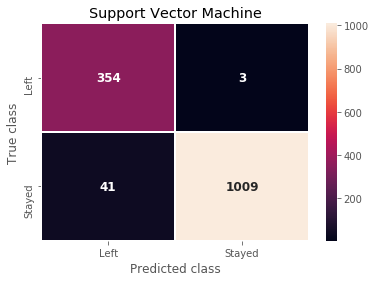

In [79]:
#Using the confusion matrix to see true and the false predisctions
y_pred = svc.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

forest_cm = confusion_matrix(y_pred, y_test, [1,0])
ax= sns.heatmap(forest_cm, annot=True, fmt='.0f', linewidths=0.5, xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"], annot_kws={"ha": 'center', "va": 'center', 'fontsize': 12, 'weight': 'bold'})

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Cross Validation Scores are [0.9 0.9 1.  1.  1.  0.9 1.  1.  0.8 0.9]
Average Cross Validation score: 0.94


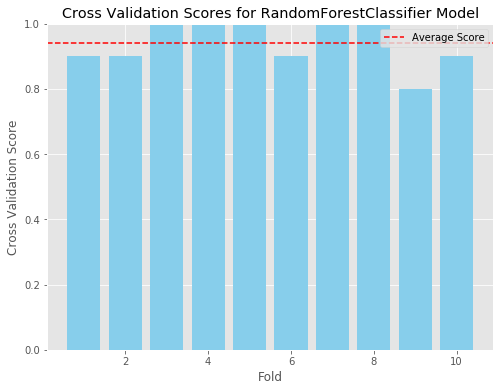

In [81]:
#Perfoming cross validation with 5 splits of data gives consistent scores which give us comfort in assuming that the model does not overfit
# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined
# For demonstration purposes, I'll generate some random data for X_train and y_train
from sklearn.datasets import make_classification

X_train, y_train = make_classification(n_samples=100, n_features=20, random_state=42)

# Initialize the RandomForestClassifier
logreg = RandomForestClassifier(n_estimators=100, random_state=42)
logreg.fit(X_train, y_train)

# Define the number of splits for KFold cross-validation
kf = KFold(n_splits=10)

# Perform cross-validation and obtain scores
scores = cross_val_score(svc, X_train, y_train, cv=kf)

# Print cross-validation scores
print("Cross Validation Scores are {}".format(scores))
print("Average Cross Validation score: {}".format(scores.mean().round(2)))

# Create a bar chart of cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scores) + 1), scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Scores for RandomForestClassifier Model')
plt.ylim(0, 1)  # Set y-axis limits to ensure consistency
plt.axhline(y=scores.mean(), color='red', linestyle='--', label='Average Score')  # Add horizontal line for average score
plt.legend()
plt.show()

# Feature Importance

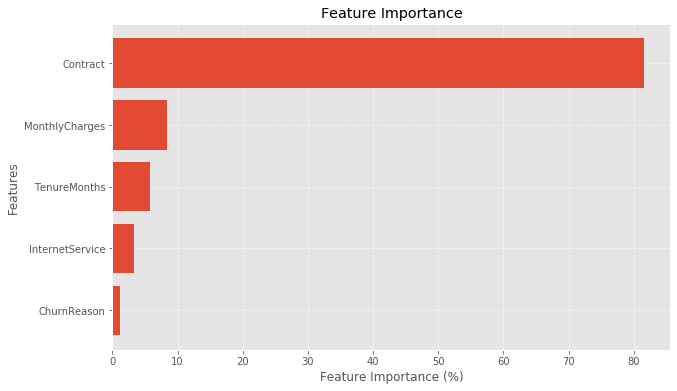

In [80]:
#checking the contribution of the selected features
feature_labels = np.array(['TenureMonths','InternetService','MonthlyCharges','ChurnReason','Contract'])#'Gender',','PhoneService','InternetService','OnlineSecurity'
importance = rf.feature_importances_

# Sort feature importances and feature labels by importance
sorted_indexes = np.argsort(importance)
sorted_importance = importance[sorted_indexes]
sorted_feature_labels = feature_labels[sorted_indexes]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance * 100.0, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_labels)
plt.xlabel('Feature Importance (%)')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()   